# Exercise 3

## Function we want to minimize

$f(x) = x + y$ 

## subject to the constraint

$h1(x) = x + y + z - 1$

$ and $

$h2(x) = x^{2} + 2y^{2} + z^{2} - 1 $

# Let's define the merit function

## pure
- $p(x) = \frac{1}{2}h_{1}(x)^Th_{1}(x) + \frac{1}{2}h_{2}(x)^Th_{2}(x) = ||h(x)||_2^2 = \frac{1}{2}(x + y + z - 1)^T (x + y + z - 1) + \frac{1}{2}(x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)$

$P(x,\mu) = f(x) + \mu p(x) = x + y + \frac{\mu}{2}[(x + y + z - 1)^T (x + y + z - 1) + (x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)]$

## Augmented Lagrangian

$
\begin{equation}
\begin{aligned}
L(x,\lambda,\mu) &= f(x) + \lambda^T_{1}h_{1}(x) + \lambda^T_{2}h_{2}(x) + \frac{\mu}{2}(h_{1}(x)^Th_{1}(x) + h_{2}(x)^Th_{2}(x)) \\
&= x + y + \lambda_{1}^T(x + y + z - 1) + \lambda_{2}^T(x^{2} + 2y^{2} + z^{2} - 1) + \frac{\mu}{2}[(x + y + z - 1)^T (x + y + z - 1) + (x^{2} + 2y^{2} + z^{2} - 1)^T(x^{2} + 2y^{2} + z^{2} - 1)]
\end{aligned}
\end{equation}
$

# Algorithms

## pure

1. For $k=0$ choose: $\mu_0, x_0$
2. $x_{k+1}$ = $argmin_x$ $P(x, \mu_k)$
3. Choose $\mu_{k+1} > \mu_k$, $k=k+1$, repeat step 2.

## Augmented Lagrangian

1. For $k=0$, choose: $\lambda_0, x_0, \mu_0$
2. $x_{k+1}$ = $argmin_x$ $L(x,\lambda_k, \mu_k)$
3. $\lambda_k$


# Roadmap

- [x] Find optimization algorithm from scipy
2. Create naive optimization loop for pure method (no visualizations, no keeping track of metrics) [ ]
3. Once that is done, start recording certain metrics (nº iterations, $f(x_k)$, $P(x,\mu)$, $\mu$ ) [ ]
4. Repeat 2,3 for Augmented Lagrangian [ ]



In [5]:
# optimization algorithm to minimize unconstrained function
from scipy.optimize import minimize
import pandas as pd
import numpy as np
import matplotlib as plt

In [9]:
# function to minimize
f = lambda x: x[0] + x[1]
# its gradient/jacobian
JacF = lambda x: [1, 1]
# norm of its gradient/jacobian
normJacF = lambda x: np.linalg.norm(JacF(x))
# constraint
h1 = lambda x: x[0] + x[1] + x[2] - 1
h2 = lambda x: x[0]**2 + 2*x[1]**2 + x[2]**2 - 1

array([[5879872]])

## Penalty Method

In [10]:
# feasibility penalization function
p = lambda x: 1/2 *( h1(x)**2 + h2(x)**2 )
# Merit function
P = lambda mu: lambda x: f(x) + mu*p(x)
JacP = lambda mu: lambda x: np.array([1/2*mu *( 4*x[0]*(x[0]**2 + 2*x[1]**2 - 1) + 2*(x[0] + x[1] + x[2] - 1) ) + 1,
                                     1/2*mu*(8*x[1]*(x[0]**2+2*x[1]**2-1) + 2*(x[0] + x[1] + x[2] - 1)) + 1,
                                     mu*(x[0]+x[1]+x[2]-1)])

In [11]:
from scipy.optimize import newton

In [36]:
data = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'P(x)','p(x)','h1(x)','h2(x)','mu', 'mu*h1(x)', 'mu*h2(x)']).set_index('iteration')
# initial condition
i=0 # iteration
x = [20,30,15]
mu = 30
data.loc[i] = [x,f(x),normJacF(x),P(mu)(x),p(x),h1(x), h2(x), mu, mu*h1(x), mu*h2(x)]
data

,x,f(x),||f'(x)||,P(x),p(x),h1(x),h2(x),mu
iteration,,,,,,,,
0,"[20, 30, 15]",50,1.414214,88198130.0,2939936.0,64,2424,30


In [40]:
# start optimization loop
# Run this cell again to get more iterates
i += 1 
result = newton(JacP(mu), x, maxiter=1000,disp=False)
x = result
data.loc[i] = [x, f(x), normJacF(x), P(mu)(x), p(x), h1(x), h2(x), mu, mu*h1(x), mu*h2(x)]
mu *= 2
data

,x,f(x),||f'(x)||,P(x),p(x),h1(x),h2(x),mu
iteration,,,,,,,,
0,"[20, 30, 15]",50,1.414214,8.819813e+07,2.939936e+06,64,2424,30
1,"[-0.8177814021960215, -0.41886455417881613, 2....",-1.23665,1.414214,3.768396e+02,1.260254e+01,-0.000397989,5.02047,30
2,"[-0.8197161026753894, -0.4112158922212423, 2.2...",-1.23093,1.414214,7.448550e+02,1.243477e+01,-5.67167e-05,4.98694,60
3,"[-0.8184254617017457, -0.409430908444137, 2.22...",-1.22786,1.414214,1.479886e+03,1.234262e+01,-1.70986e-06,4.96842,120
4,"[-0.8175502757051053, -0.4087541360118836, 2.2...",-1.2263,1.414214,2.949751e+03,1.229574e+01,-6.92438e-09,4.95898,240


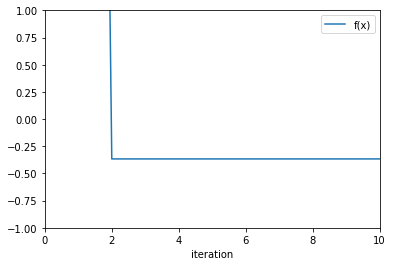

In [24]:
data.plot(y='f(x)', use_index=True,ylim=(-1,1))

x seems to be converging to something around (1,1,0)

## Augmented Lagrangian Method

In [124]:
print(f([0,0,1]))
print(f([4/5, 2/5, -1/5]))
print(h1([0,0,1]))
print(h2([0,0,1]))
print(h1([4/5, 2/5, -1/5]))
print(h2([4/5, 2/5, -1/5]))

0
1.2000000000000002
0
0
2.220446049250313e-16
2.220446049250313e-16


In [44]:
# feasibility penalization function
p = lambda x: 1/2 * (h1(x)**2 + h2(x)**2)
# Merit function
L = lambda mu,lamb1,lamb2: lambda x: f(x) + lamb1*h1(x) + lamb2*h2(x) + mu*p(x)

JacL = lambda mu,lamb1,lamb2: lambda x: np.array([
    1 + lamb1 + 2*lamb2*x[0] + 1/2*mu *( 4*x[0]*(x[0]**2 + 2*x[1]**2 - 1) + 2*(x[0] + x[1] + x[2] - 1) ),
    1 + lamb1 + 4*lamb2*x[1] + 1/2*mu*(8*x[1]*(x[0]**2+2*x[1]**2-1) + 2*(x[0] + x[1] + x[2] - 1)),
    lamb1 + 2*lamb2*x[2] + mu*(x[0]+x[1]+x[2]-1)])

In [154]:
dataAug = pd.DataFrame(columns=['iteration','x', 'f(x)',"||f'(x)||",'L(x)','p(x)','h1(x)', 'h2(x)','mu','lambda1','lambda2']).set_index('iteration')
# initial condition
j=0 # iteration
w = [20,30,15]
mu = 2
lamb1 = 2
lamb2 = 2
dataAug.loc[j] = [w,f(w),normJacF(w),L(mu,lamb1,lamb2)(w),p(w),h1(w),h2(w),mu,lamb1,lamb2]
dataAug

,x,f(x),||f'(x)||,L(x),p(x),h1(x),h2(x),mu,lambda1,lambda2
iteration,,,,,,,,,,
0,"[20, 30, 15]",50,1.414214,5884898.0,2939936.0,64,2424,2,2,2


In [155]:
# start optimization loop
# Run this cell again to get more iterates
max_iter = 100
while j <= max_iter:
    j += 1 
    previous_f = dataAug.loc[j-1,'f(x)']
    if f(w) < 0.7*previous_f:
        mu += 3
    res = newton(JacL(mu,lamb1,lamb2), w, maxiter=15000,disp=False)
    w = res
    dataAug.loc[j] = [w, f(w), normJacF(w), L(mu,lamb1,lamb2)(w), p(w), h1(w),h2(w), mu, lamb1,lamb2]
    lamb1 = lamb1 + mu * h1(w)
    lamb2 = lamb2 + mu * h2(w)
dataAug.tail(3)

/Users/simaonovais/.pyenv/versions/3.8.1/envs/optimization/lib/python3.8/site-packages/scipy/optimize/zeros.py:463: RuntimeWarning: some failed to converge after 15000 iterations
  warnings.warn(msg, RuntimeWarning)


,x,f(x),||f'(x)||,L(x),p(x),h1(x),h2(x),mu,lambda1,lambda2
iteration,,,,,,,,,,
99,"[0.7892946796692468, 0.387648201903507, -0.092...",1.17694,1.414214,1.038298,0.005839,0.0841066,-0.0678531,35,-2.61192,1.8176
100,"[0.833979906299365, 0.3921145091610131, -0.243...",1.22609,1.414214,1.259322,0.002114,-0.017832,0.0625301,35,0.331812,-0.557256
101,"[0.9148117030482565, -0.24136177246860674, 0.3...",0.67345,1.414214,0.802597,0.001320,-0.0202198,0.0472297,35,-0.292306,1.6313


In [156]:
dataAug.tail(3)

,x,f(x),||f'(x)||,L(x),p(x),h1(x),h2(x),mu,lambda1,lambda2
iteration,,,,,,,,,,
99,"[0.7892946796692468, 0.387648201903507, -0.092...",1.17694,1.414214,1.038298,0.005839,0.0841066,-0.0678531,35,-2.61192,1.8176
100,"[0.833979906299365, 0.3921145091610131, -0.243...",1.22609,1.414214,1.259322,0.002114,-0.017832,0.0625301,35,0.331812,-0.557256
101,"[0.9148117030482565, -0.24136177246860674, 0.3...",0.67345,1.414214,0.802597,0.001320,-0.0202198,0.0472297,35,-0.292306,1.6313


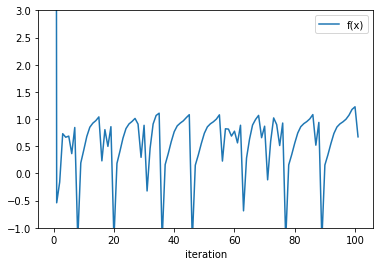

In [157]:
dataAug.plot(y='f(x)', use_index=True,ylim=(-1,3))